#Exploratory Data Analysis
### Features
#### Numerical Data
* Year of publishing
* Number of Pages
* Author Followers
* Number of Awards

#### Categorical Data
* Genre
* Language
* Book format

#### Text Data
* Title
* Author
* Summary

#### Image Data
* Book Cover

### Output
* Rating
* Rating Count
* Review Count

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import matplotlib.pyplot as plt 
import numpy as np
import re
 
def createCSV(nameOfFile, data):
    with open(nameOfFile+'.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(data)

rows = []
isHeader = False
header = []
with open('./drive/My Drive/ML Project/alldata.csv') as file:
	csv_reader = csv.reader(file, delimiter=',')
	for row in csv_reader:
		if isHeader is False:
			print(row)
			header = row
			isHeader = True
			continue
		year = re.findall(r"[0-9]{4,4}", row[6])
		if year:
			row[6] = int(year[-1])
		else:
			row[6] = None
		row[7] = row[7].split('//')
		row[8] = int(row[8])
		row[9] = float(row[9])
		row[10] = int(row[10])
		row[11] = int(row[11])
		row[13] = int(row[13])
		row[14] = int(row[14])
		rows.append(row)

['isbn', 'title', 'author', 'imageLink', 'bookSummary', 'bookFormat', 'yearPublished', 'genre', 'noOfPages', 'rating', 'ratingCount', 'reviewCount', 'language', 'noOfAwards', 'authorFollowers']


In [ ]:
genres = {}
for row in rows:
    for i in range(len(row[7])):
        if row[7][i] not in genres:
            genres[row[7][i]] = 0
        genres[row[7][i]] += 1

final_genres = {}
for genre in genres: 
	if genres[genre] >= 2000:
		final_genres[genre] = 0

for row in rows:
	for i in row[7]:
		if i in final_genres:
			final_genres[i] += 1

uncommon_genre_books = 0
for row in rows:
	temp = []
	for genre in row[7]:
		if genre in final_genres:
			temp.append(genre)
	if not temp:
		uncommon_genre_books += 1
	row[7] = temp

print('The number of books having no genre from the top genres are', uncommon_genre_books)
print('If we delete these books and ignore genes with occurence < 2000, we are left with the following genres')
for genre in final_genres:
	print(genre, final_genres[genre])
print(final_genres.keys())
# pie chart

The number of books having no genre from the top genres are 256
If we delete these books and ignore genes with occurence < 2000, we are left with the following genres
Fantasy 16190
Fiction 13822
Adult 5183
Adventure 2791
Audiobook 6037
Historical 5905
Historical Fiction 2899
Romance 10366
Classics 2626
Cultural 3237
Novels 2783
Adult Fiction 2921
Contemporary 4879
Literature 4046
Young Adult 8179
Childrens 4391
Mystery 6925
Crime 2191
Nonfiction 4464
History 2110
Biography 2520
Autobiography 2042
Thriller 4538
Science Fiction 4724
Womens Fiction 2107
Humor 2808
Paranormal 4235
Religion 2026
Sequential Art 3908
Comics 3053
dict_keys(['Fantasy', 'Fiction', 'Adult', 'Adventure', 'Audiobook', 'Historical', 'Historical Fiction', 'Romance', 'Classics', 'Cultural', 'Novels', 'Adult Fiction', 'Contemporary', 'Literature', 'Young Adult', 'Childrens', 'Mystery', 'Crime', 'Nonfiction', 'History', 'Biography', 'Autobiography', 'Thriller', 'Science Fiction', 'Womens Fiction', 'Humor', 'Paranormal',

In [ ]:
book_formats = {
	'mass': set([]),
	'hardcover': set([]),
	'paperback': set([]),
	'ebook': set([]),
	'kindle edition': set([]),
	'other': set([])
}
book_formats_count = {
	'mass': 0,
	'hardcover': 0,
	'paperback': 0,
	'ebook': 0,
	'kindle edition': 0,
	'other': 0
}
for row in rows:
	row[5] = row[5].lower()
	flag = False
	for book_format in book_formats:
		if book_format in row[5]:
			book_formats[book_format].add(row[5])
			book_formats_count[book_format] += 1
			flag = True
			row[5] = book_format
			break
	if flag == False:
		book_formats['other'].add(row[5])
		book_formats_count['other'] += 1
		row[5] = 'other'

for book_format in book_formats:
	print(book_format)
	print(book_formats[book_format])
	print(book_formats_count[book_format])

print(book_formats.keys())
# pie chart

mass
{'mass market', 'mass market paperback', 'mass_market'}
1155
hardcover
{'hardcover', 'slipcased hardcover', 'hardcover-spiral'}
7133
paperback
{'perfect paperback', 'paperback', 'trade paperback', 'paperback '}
8932
ebook
{'ebook'}
524
kindle edition
{'kindle edition'}
2293
other
{'roughcut', 'capa dura', 'capa comum', '文庫', 'science fiction book club omnibus', 'pasta dura', 'audio', 'unknown binding', 'trade paper', 'bookpaper', 'hardback', 'spiral-bound', 'nook', 'boxed set', 'unbound', 'comics', 'brochura', 'library binding', 'audible audio', 'mp3 cd', 'tapa blanda con solapas', 'audio cassette', 'illustrated book and cd set', 'board book', 'コミック', 'leather bound', 'novelty book', 'audiobook', 'box set', 'cloth', 'broschiert', 'poche', 'audio cd', 'taschenbuch', 'pasta blanda', 'comic'}
237
dict_keys(['mass', 'hardcover', 'paperback', 'ebook', 'kindle edition', 'other'])


In [ ]:
languages = {}

for row in rows:
	row[12] = row[12].lower()
	if row[12] not in languages:
		languages[row[12]] = 0
	languages[row[12]] += 1

for language in languages:
	print(language, languages[language])

# english vs not english
final_languages = {
	  'english': 0,
	  'other': 0,
}
for language in languages:
	if language == 'english':
		final_languages['english'] += languages[language]
	else:
		final_languages['other'] += languages[language]
# most popular languages except english
# find goodreads lists for other languages

english 19200
polish 164
french 46
spanish 294
 103
dutch 46
multiple languages 8
filipino; pilipino 4
indonesian 56
german 42
arabic 16
vietnamese 6
portuguese 45
italian 37
urdu 2
farsi 1
norwegian 3
japanese 63
romanian 6
swedish 19
turkish 35
malayalam 4
afrikaans 1
korean 1
danish 5
serbian 6
croatian 12
finnish 2
turkish, ottoman (1500-1928) 1
czech 26
english, middle (1100-1500) 1
russian 5
slovak 5
marathi 1
malay 1
catalan; valencian 1
thai 1
persian 3
lithuanian 1
bulgarian 1


In [ ]:
too_many_pages_count = 0
records = []
for row in rows:
	row[8] = int(row[8])
	row[9] = float(row[9])
	row[10] = int(row[10])
	if row[8] > 10000:
		# print(row[1][1:-1], row[8])
		records.append(row)
		too_many_pages_count += 1
		continue
print('Number of books with pages > 10000 are', too_many_pages_count)

for record in records:
	rows.remove(record)
 
count = sum(1 for row in rows if row[6] == None)
print(count, 'books dont have a publishing year')
old = sum(1 for row in rows if row[6] is not None and row[6] < 1800)
print(old, 'books have publishing year < 1800')

count = sum(1 for row in rows if int(row[14]) == 0)
print(count, 'books have author ratings as 0')

Number of books with pages > 10000 are 1
15 books dont have a publishing year
129 books have publishing year < 1800
73 books have author ratings as 0


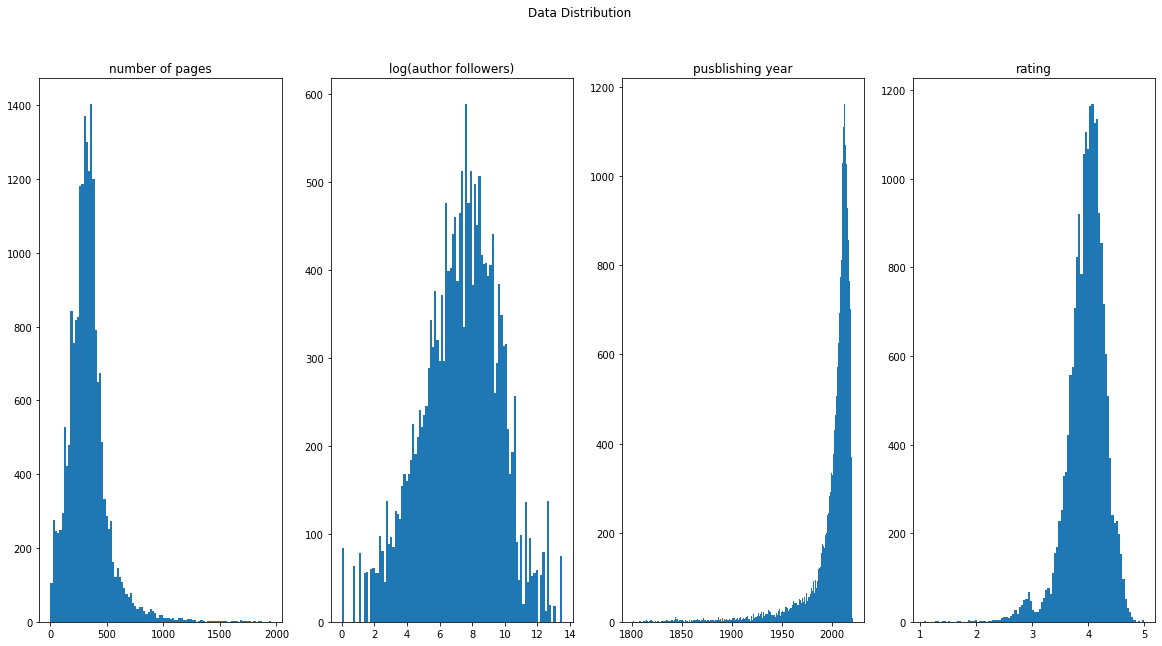

<Figure size 432x288 with 0 Axes>

In [ ]:
import math

plt.figure(figsize = (20, 10))
plt.suptitle('Data Distribution')

# plt.subplot(2, 3, 1)
# plt.title('genres')
# plt.bar([k for k in range(len(final_genres.keys()))], [float(v) for v in final_genres.values()])
# plt.xlabel = 'genre no.'
# plt.subplot(2, 3, 1)
# plt.title('book formats')
# plt.pie([float(v) for v in book_formats_count.values()], labels=[k for k in book_formats_count.keys()])

# plt.subplot(2, 3, 2)
# plt.title('language')
# plt.pie([float(v) for v in final_languages.values()], labels=[k for k in final_languages.keys()],
#            autopct=None)

number_of_pages = [row[8] for row in rows if row[8] < 2000]
plt.subplot(1, 4, 1)
plt.title('number of pages')
plt.hist(number_of_pages, bins = 100)

log_author_followers = [math.log(row[14]) for row in rows if row[14] != 0]
plt.subplot(1, 4, 2)
plt.title('log(author followers)')
plt.hist(log_author_followers, bins = 100, label = 'log of author ratings')

publishing_year = [row[6] for row in rows if row[6] != None and row[6] > 1800]
plt.subplot(1, 4, 3)
plt.title('pusblishing year')
plt.hist(publishing_year, bins = 221, label = 'publishing year')

# no_of_awards = [int(row[13]) for row in rows if row[13] != None and row[13] < 10]
# plt.subplot(2, 5, 7)
# plt.title('No of awards')
# plt.hist(no_of_awards, bins = 10, label = 'no of awards')

rating = [row[9] for row in rows]
plt.subplot(1, 4, 4)
plt.title('rating')
plt.hist(rating, bins = 100)

# rating_count = [math.log(row[10]) for row in rows]
# plt.subplot(2, 5, 9)
# plt.title('log(rating count)')
# plt.hist(rating_count, bins = 100)

# review_count = [math.log(row[11]) for row in rows if row[11] != 0]
# plt.subplot(2, 5, 10)
# plt.title('log(review count)')
# plt.hist(review_count, bins = 100)

plt.show()
plt.savefig('data_distribution.png', dpi = 200)

In [ ]:
[float(v) for v in final_languages.values()]

[19200.0, 1074.0]

In [ ]:
rows = [header] + rows
print(header)
createCSV('./drive/My Drive/ML Project/cleaned_data', rows)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ML Project/cleaned_data.csv")
df.head(5)

In [ ]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
sns.boxplot(x=df['rating'])

In [ ]:
sns.boxplot(x=df['ratingCount'])


In [ ]:
sns.boxplot(x=df['noOfAwards'])

In [ ]:
sns.boxplot(x=df['authorFollowers'])

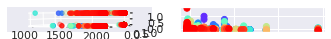

In [ ]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
import matplotlib.cm as cm

# Next line to silence pyflakes. This import is needed.
Axes3D

data = pd.read_csv('./drive/My Drive/ML Project/one_hot_encoded.csv', na_values='.')
X = (data.values[:, [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 24, 26, 27, 28, 29, -3, -1]]).astype('float64')
Y = data.values[:,-6]
color = cm.rainbow(np.linspace(0, 1, len(Y)))

n_points = 1000
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 1))
# fig.suptitle("Manifold Learning with %i points, %i neighbors"
#              % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    # print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    # ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    # ax.axis('tight')

In [ ]:
# plt.savefig('tsne-scatter.png')
# plt.show()
fig.set_size_inches(200, 100)
fig.savefig('tsne-scatter1.png')

In [5]:
from sklearn.manifold import TSNE
import pandas as pd
data_train = pd.read_csv('./drive/My Drive/ML Project/data/data_train.csv', na_values='.')
X = (data_train.values[:, [11, 5, 9, 4, -1, -5, -10]]).astype('float64')
Y = data_train.values[:,6]
X_embedded = TSNE(n_components=2).fit_transform(X[:1000])

In [8]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
import matplotlib.cm as cm
import numpy as np

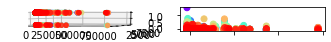

In [11]:
color = cm.rainbow(np.linspace(0, 1, len(Y)))

n_points = 1000
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 1))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    # print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    # ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    # ax.axis('tight')

In [12]:
# plt.savefig('tsne-scatter.png')
# plt.show()
fig.set_size_inches(200, 100)
fig.savefig('tsne-scatter1.png')